# <span style="color:#0F19C9">Contents</span>

- [Importing and loading data](#importing-and-loading-data)
- [Understanding data](#understanding-data)
- [Multivariable Analysis](#multivariable-analysis)

# <span style="color:#0F19C9">Importing and loading data</span>

Before we start this notebook, we build an Excel File that can be found in the Data folder when we import main components of the MSFT financial statements, including Balance Sheet, Income Statement, Cash Flow Statement and some important Ratios from them. In the second spreadsheet, we keep only the concerning ones to the present analysis.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.ticker as mtick
from matplotlib import gridspec
import seaborn as sns

In [2]:
# Import my color palette
juan_colors = ['#101B4B', '#545E85', '#A3A8B2',
               '#E7E7E7', '#0F19C9', '#F6D673']

# Crear la paleta de colores personalizada
colors = [juan_colors[5], juan_colors[0]]
juan_cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)

# Setting plot font
plt.rc('font', family='Georgia', size=12)

In [3]:
df = pd.read_excel('../Data/msft_regression_data.xlsx', sheet_name='EBITDA_Model_Data')

# <span style="color:#0F19C9">Understanding data</span>

Even when it is expected, because the Excel file was build manually, we do not find any null value and any duplicates. So we can start with the basic analysis of the different variables to understand the actual size of our analysis.

In [4]:
# Print null and duplicated values
print(f'The original dataframe has {df.isna().sum().sum()} null values and {df.duplicated().sum()} duplicates')

The original dataframe has 0 null values and 0 duplicates


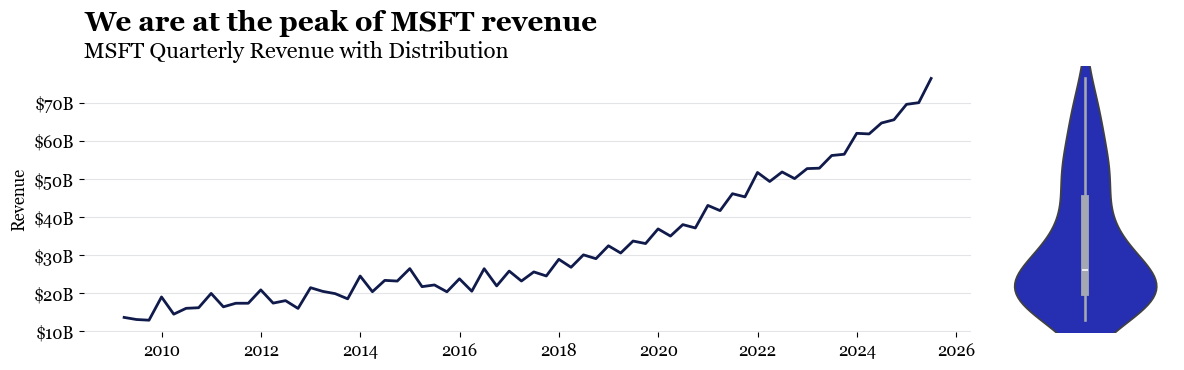

In [123]:
# Create the figure and subplots with gridspec
fig = plt.figure(figsize=(12, 4))
gs = gridspec.GridSpec(1, 2, width_ratios=[5, 1])
plt.suptitle('We are at the peak of MSFT revenue',
             x=0.077, y=0.92,
             ha='left', size=20,
             weight='bold')
ax0 = fig.add_subplot(gs[0])  # Left subplot (line plot)
ax1 = fig.add_subplot(gs[1])  # Right subplot (violin plot)

# --- Line Plot (ax0) ---
ax0.plot(df['Date'], df['Revenue'], color=juan_colors[0], linewidth=2)
ax0.set_title('MSFT Quarterly Revenue with Distribution', size=16, loc='left')
ax0.set_xlabel('')
ax0.set_ylabel('Revenue')
ax0.grid(True, color=juan_colors[2], axis='y', alpha=0.3)
ax0.spines[['top', 'left', 'bottom', 'right']].set_visible(False)
formatter_y = mtick.FuncFormatter(lambda y, p: f'${y/1e9:,.0f}B')
ax0.yaxis.set_major_formatter(formatter_y)

# --- Violin Plot (ax1) ---
sns.violinplot(y=df['Revenue'], ax=ax1,
               color=juan_colors[4],
               inner='box')
for artist in ax1.get_children():
    if isinstance(artist, plt.Line2D) and artist.get_linestyle() == '-':
        artist.set_color(juan_colors[2])

# Align the y-axis limits of both plots to ensure the grid aligns perfectly
ax1.set_ylim(ax0.get_ylim())

ax1.set_ylabel('')
ax1.set_xticks([])
ax1.set_yticks([])
ax1.spines[['top', 'left', 'bottom', 'right']].set_visible(False)

plt.tight_layout()
plt.show()

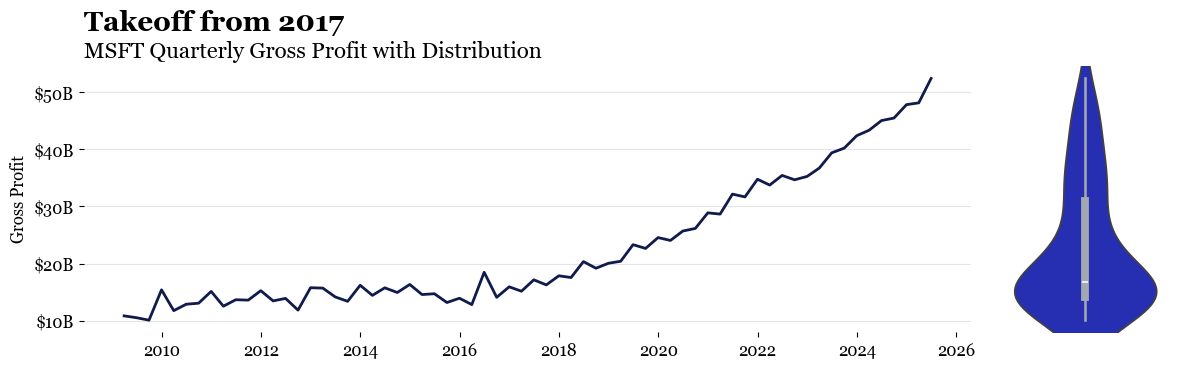

In [127]:
# Create the figure and subplots with gridspec
fig = plt.figure(figsize=(12, 4))
gs = gridspec.GridSpec(1, 2, width_ratios=[5, 1])
plt.suptitle('Takeoff from 2017',
             x=0.077, y=0.92,
             ha='left', size=20,
             weight='bold')
ax0 = fig.add_subplot(gs[0])  # Left subplot (line plot)
ax1 = fig.add_subplot(gs[1])  # Right subplot (violin plot)

# --- Line Plot (ax0) ---
ax0.plot(df['Date'], df['Gross_Profit'], color=juan_colors[0], linewidth=2)
ax0.set_title('MSFT Quarterly Gross Profit with Distribution', size=16, loc='left')
ax0.set_xlabel('')
ax0.set_ylabel('Gross Profit')
ax0.grid(True, color=juan_colors[2], axis='y', alpha=0.3)
ax0.spines[['top', 'left', 'bottom', 'right']].set_visible(False)
formatter_y = mtick.FuncFormatter(lambda y, p: f'${y/1e9:,.0f}B')
ax0.yaxis.set_major_formatter(formatter_y)

# --- Violin Plot (ax1) ---
sns.violinplot(y=df['Gross_Profit'], ax=ax1,
               color=juan_colors[4],
               inner='box')
for artist in ax1.get_children():
    if isinstance(artist, plt.Line2D) and artist.get_linestyle() == '-':
        artist.set_color(juan_colors[2])

# Align the y-axis limits of both plots to ensure the grid aligns perfectly
ax1.set_ylim(ax0.get_ylim())

ax1.set_ylabel('')
ax1.set_xticks([])
ax1.set_yticks([])
ax1.spines[['top', 'left', 'bottom', 'right']].set_visible(False)

plt.tight_layout()
plt.show()


Although there is not such a increase in the revenue slope, Gross Profit and EBITDA do have one, which tells us that they have been much more effective in operational terms over the last 7 years.

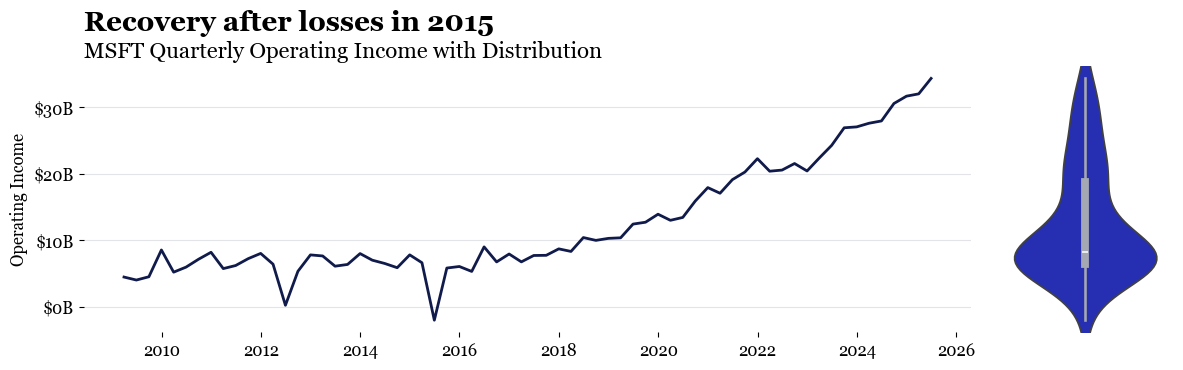

In [128]:
# Create the figure and subplots with gridspec
fig = plt.figure(figsize=(12, 4))
gs = gridspec.GridSpec(1, 2, width_ratios=[5, 1])
plt.suptitle('Recovery after losses in 2015',
             x=0.077, y=0.92,
             ha='left', size=20,
             weight='bold')
ax0 = fig.add_subplot(gs[0])  # Left subplot (line plot)
ax1 = fig.add_subplot(gs[1])  # Right subplot (violin plot)

# --- Line Plot (ax0) ---
ax0.plot(df['Date'], df['Operating_Income'], color=juan_colors[0], linewidth=2)
ax0.set_title('MSFT Quarterly Operating Income with Distribution', size=16, loc='left')
ax0.set_xlabel('')
ax0.set_ylabel('Operating Income')
ax0.grid(True, color=juan_colors[2], axis='y', alpha=0.3)
ax0.spines[['top', 'left', 'bottom', 'right']].set_visible(False)
formatter_y = mtick.FuncFormatter(lambda y, p: f'${y/1e9:,.0f}B')
ax0.yaxis.set_major_formatter(formatter_y)

# --- Violin Plot (ax1) ---
sns.violinplot(y=df['Operating_Income'], ax=ax1,
               color=juan_colors[4],
               inner='box')
for artist in ax1.get_children():
    if isinstance(artist, plt.Line2D) and artist.get_linestyle() == '-':
        artist.set_color(juan_colors[2])

# Align the y-axis limits of both plots to ensure the grid aligns perfectly
ax1.set_ylim(ax0.get_ylim())

ax1.set_ylabel('')
ax1.set_xticks([])
ax1.set_yticks([])
ax1.spines[['top', 'left', 'bottom', 'right']].set_visible(False)

plt.tight_layout()
plt.show()

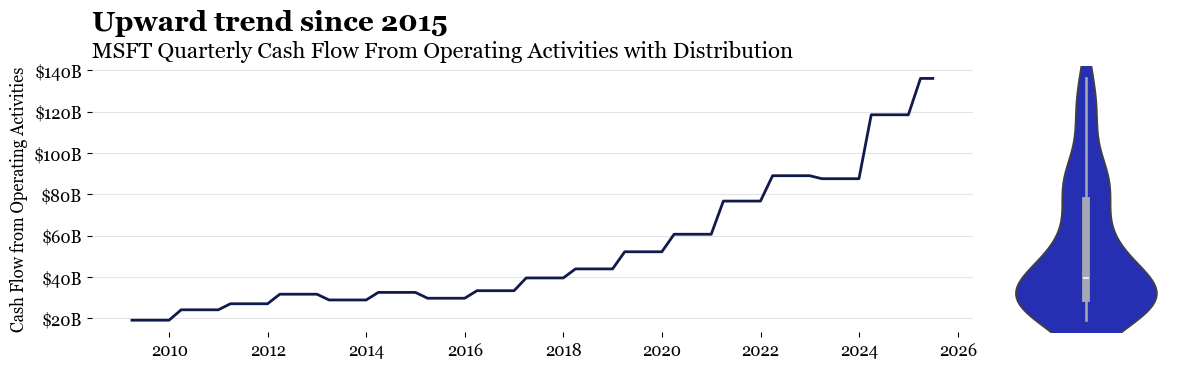

In [132]:
# Create the figure and subplots with gridspec
fig = plt.figure(figsize=(12, 4))
gs = gridspec.GridSpec(1, 2, width_ratios=[5, 1])
plt.suptitle('Upward trend since 2015',
             x=0.083, y=0.92,
             ha='left', size=20,
             weight='bold')
ax0 = fig.add_subplot(gs[0])  # Left subplot (line plot)
ax1 = fig.add_subplot(gs[1])  # Right subplot (violin plot)

# --- Line Plot (ax0) ---
ax0.plot(df['Date'], df['Cash_Flow_From_Operating_Activities'], color=juan_colors[0], linewidth=2)
ax0.set_title('MSFT Quarterly Cash Flow From Operating Activities with Distribution', size=16, loc='left')
ax0.set_xlabel('')
ax0.set_ylabel('Cash Flow from Operating Activities')
ax0.grid(True, color=juan_colors[2], axis='y', alpha=0.3)
ax0.spines[['top', 'left', 'bottom', 'right']].set_visible(False)
formatter_y = mtick.FuncFormatter(lambda y, p: f'${y/1e9:,.0f}B')
ax0.yaxis.set_major_formatter(formatter_y)

# --- Violin Plot (ax1) ---
sns.violinplot(y=df['Cash_Flow_From_Operating_Activities'], ax=ax1,
               color=juan_colors[4],
               inner='box')
for artist in ax1.get_children():
    if isinstance(artist, plt.Line2D) and artist.get_linestyle() == '-':
        artist.set_color(juan_colors[2])

# Align the y-axis limits of both plots to ensure the grid aligns perfectly
ax1.set_ylim(ax0.get_ylim())

ax1.set_ylabel('')
ax1.set_xticks([])
ax1.set_yticks([])
ax1.spines[['top', 'left', 'bottom', 'right']].set_visible(False)

plt.tight_layout()
plt.show()

C:\Users\j.ramosb\AppData\Local\Temp\ipykernel_34572\943384259.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Operating', 'EBIT', 'Pre-Tax', 'Net Profit', 'EBITDA'], rotation=0)


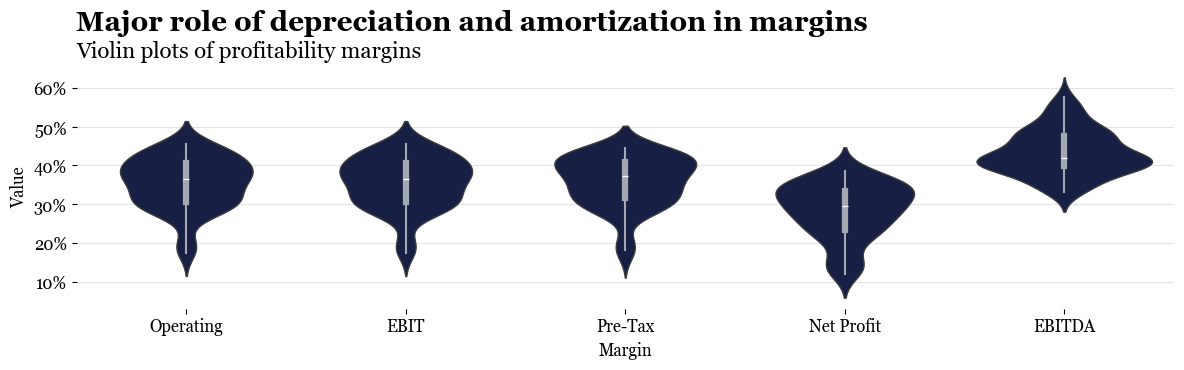

In [135]:
fig, ax = plt.subplots(figsize=(12, 4))
fig.suptitle('Major role of depreciation and amortization in margins', 
             ha='left', x=0.07, y=0.92, size=20, weight='bold')
sns.violinplot(data=df[['Operating_Margin', 'EBIT_Margin', 'Pre-Tax_Profit_Margin', 'Net_Profit_Margin', 'EBITDA_Margin']], 
               ax=ax,
               color=juan_colors[0], 
               inner='box', 
               linewidth=1)
for artist in ax.get_children():
    if isinstance(artist, plt.Line2D) and artist.get_linestyle() == '-':
        artist.set_color(juan_colors[2])
ax.set_title('Violin plots of profitability margins', 
             size=16, loc='left')
ax.set_xlabel('Margin')
ax.set_ylabel('Value')
formatter_y = mtick.PercentFormatter(xmax=1, decimals=0)
ax.yaxis.set_major_formatter(formatter_y)
ax.set_axisbelow(True)
ax.grid(True, color=juan_colors[2], axis='y', alpha=0.3)
ax.spines[['top', 'left', 'bottom', 'right']].set_visible(False)
ax.set_xticklabels(['Operating', 'EBIT', 'Pre-Tax', 'Net Profit', 'EBITDA'], rotation=0)
plt.tight_layout()
plt.show()

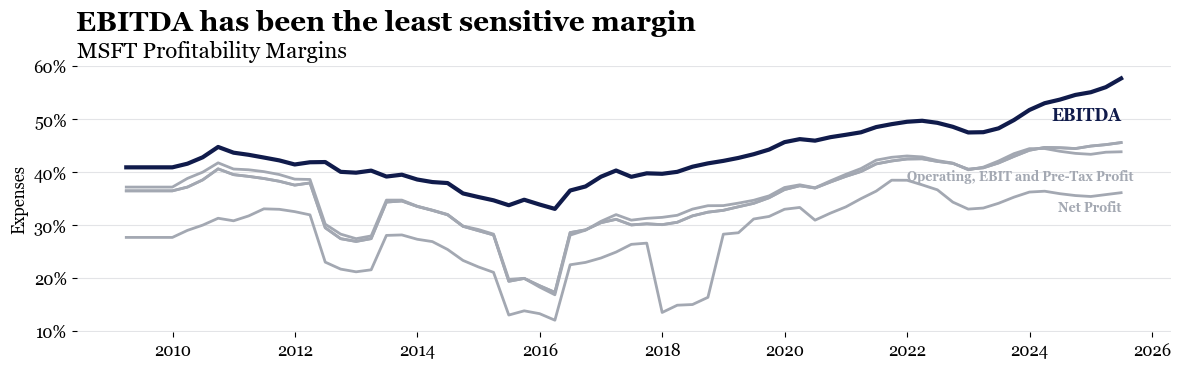

The standard deviation of these margins are:


Operating_Margin         0.067535
EBIT_Margin              0.067535
Pre-Tax_Profit_Margin    0.066798
Net_Profit_Margin        0.071486
EBITDA_Margin            0.057934
dtype: float64

In [ ]:
# Create the figure
fig, ax = plt.subplots(figsize=(12, 4))
fig.suptitle('EBITDA has been the least sensitive margin', 
             ha='left', x=0.07, y=0.92, size=20, weight='bold')
ax.set_title('MSFT Profitability Margins', size=16, loc='left')

ax.plot(df['Date'], df['Operating_Margin'], color=juan_colors[2], linewidth=2)
ax.plot(df['Date'], df['EBIT_Margin'], color=juan_colors[2], linewidth=2)
ax.plot(df['Date'], df['Pre-Tax_Profit_Margin'], color=juan_colors[2], linewidth=2)
ax.text(df['Date'].iloc[14], df['Pre-Tax_Profit_Margin'].iloc[1]-0.046, 'Operating, EBIT and Pre-Tax Profit', 
         color=juan_colors[2], ha='left', va='center', fontsize=9, weight='bold')

ax.plot(df['Date'], df['Net_Profit_Margin'], color=juan_colors[2], linewidth=2)
ax.text(df['Date'].iloc[0], df['Net_Profit_Margin'].iloc[1]-0.025, 'Net Profit', 
         color=juan_colors[2], ha='right', va='center', fontsize=9, weight='bold')

ax.plot(df['Date'], df['EBITDA_Margin'], color=juan_colors[0], linewidth=3)
ax.text(df['Date'].iloc[0], df['EBITDA_Margin'].iloc[1]-0.055, 'EBITDA', 
         color=juan_colors[0], ha='right', va='center', fontsize=12, weight='bold')

ax.set_xlabel('')
ax.set_ylabel('Expenses')
ax.grid(True, color=juan_colors[2], axis='y', alpha=0.3)
ax.spines[['top', 'left', 'bottom', 'right']].set_visible(False)
formatter_y = mtick.PercentFormatter(xmax=1, decimals=0)
ax.yaxis.set_major_formatter(formatter_y)

plt.tight_layout()
plt.show()

print('The standard deviation of these margins are:')
df[['Operating_Margin', 
    'EBIT_Margin', 
    'Pre-Tax_Profit_Margin', 
    'Net_Profit_Margin',
    'EBITDA_Margin']].std()

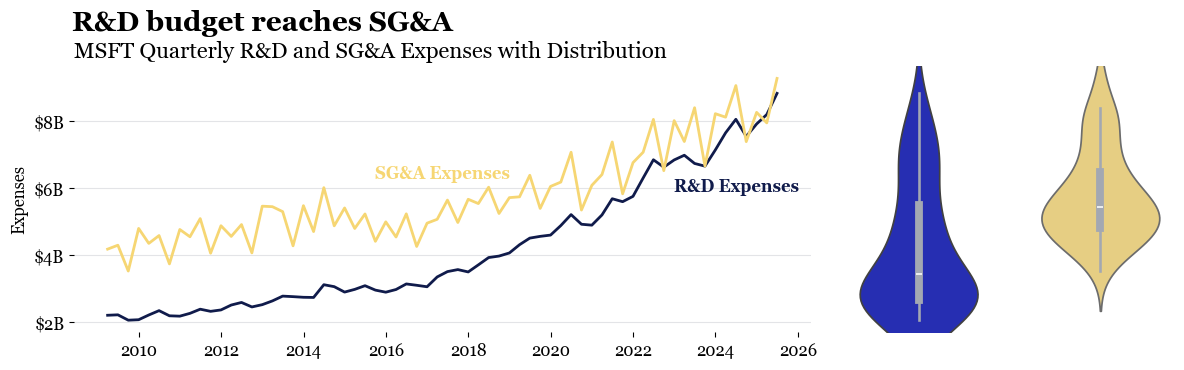

In [ ]:
# Create the figure and subplots with gridspec
fig = plt.figure(figsize=(12, 4))
gs = gridspec.GridSpec(1, 3, width_ratios=[5, 1, 1])
plt.suptitle('R&D budget reaches SG&A', x=0.067, y=0.92,
             ha='left', size=20, weight='bold')
ax0 = fig.add_subplot(gs[0])  # Left subplot (line plot)
ax1 = fig.add_subplot(gs[1])  # Right subplot (violin plot)
ax2 = fig.add_subplot(gs[2])  # Right subplot (violin plot)

# --- Line Plot (ax0) ---
ax0.plot(df['Date'], df['R&D_Expenses'], color=juan_colors[0], linewidth=2)
ax0.plot(df['Date'], df['SG&A_Expenses'], color=juan_colors[5], linewidth=2)
ax0.set_title('MSFT Quarterly R&D and SG&A Expenses with Distribution', size=16, loc='left')
ax0.set_xlabel('')
ax0.set_ylabel('Expenses')
ax0.grid(True, color=juan_colors[2], axis='y', alpha=0.3)
ax0.spines[['top', 'left', 'bottom', 'right']].set_visible(False)
formatter_y = mtick.FuncFormatter(lambda y, p: f'${y/1e9:,.0f}B')
ax0.yaxis.set_major_formatter(formatter_y)
ax0.text(df['Date'].iloc[10], df['R&D_Expenses'].iloc[10] - 0.8e9, 'R&D Expenses', 
         color=juan_colors[0], ha='left', va='center', fontsize=12, weight='bold')
ax0.text(df['Date'].iloc[39], df['SG&A_Expenses'].iloc[40] + 1.2e9, 'SG&A Expenses', 
         color=juan_colors[5], ha='left', va='center', fontsize=12, weight='bold')

# --- Violin Plot (ax1) ---
sns.violinplot(y=df['R&D_Expenses'], ax=ax1,
               color=juan_colors[4],
               inner='box')
for artist in ax1.get_children():
    if isinstance(artist, plt.Line2D) and artist.get_linestyle() == '-':
        artist.set_color(juan_colors[2])
ax1.set_ylim(ax0.get_ylim())
ax1.set_ylabel('')
ax1.set_xticks([])
ax1.set_yticks([])
ax1.spines[['top', 'left', 'bottom', 'right']].set_visible(False)

sns.violinplot(y=df['SG&A_Expenses'], ax=ax2,
               color=juan_colors[5],
               inner='box')
for artist in ax2.get_children():
    if isinstance(artist, plt.Line2D) and artist.get_linestyle() == '-':
        artist.set_color(juan_colors[2])
ax2.set_ylim(ax0.get_ylim())
ax2.set_ylabel('')
ax2.set_xticks([])
ax2.set_yticks([])
ax2.spines[['top', 'left', 'bottom', 'right']].set_visible(False)

plt.tight_layout()
plt.show()

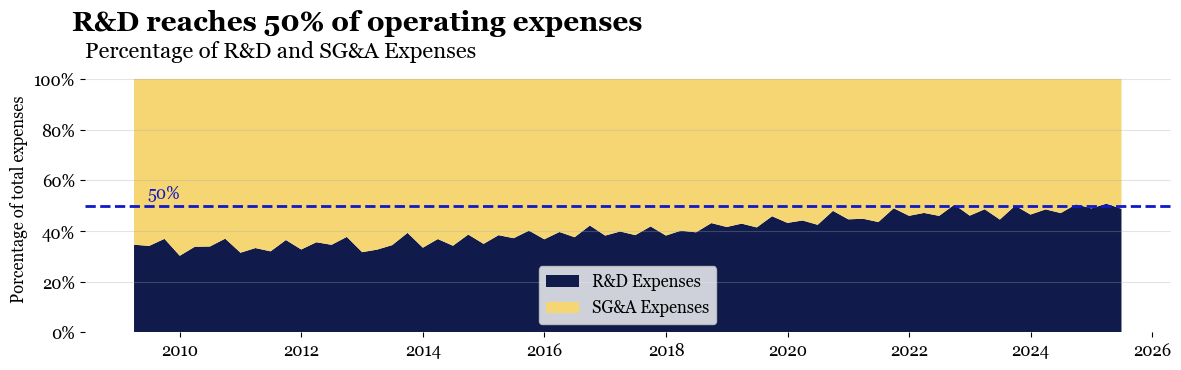

In [139]:
# Create the percentages
df_expenses = df[['Date', 'R&D_Expenses', 'SG&A_Expenses']].copy()
df_expenses['Total_Expenses'] = df_expenses['R&D_Expenses'] + df_expenses['SG&A_Expenses']
df_expenses['R&D_Expenses_%'] = df_expenses['R&D_Expenses']/df_expenses['Total_Expenses']
df_expenses['SG&A_Expenses_%'] = df_expenses['SG&A_Expenses']/df_expenses['Total_Expenses']

fig, ax = plt.subplots(figsize=(12, 4))
plt.suptitle('R&D reaches 50% of operating expenses', x=0.067, y=0.92,
             ha='left', size=20, weight='bold')
ax.stackplot(
    df_expenses['Date'],
    df_expenses['R&D_Expenses_%'],
    df_expenses['SG&A_Expenses_%'],
    labels=['R&D Expenses', 'SG&A Expenses'],
    colors=[juan_colors[0], juan_colors[5]],
    alpha=1
)
ax.axhline(0.5, color=juan_colors[4], linestyle='--', linewidth=2)
ax.text(df_expenses['Date'].iloc[-4], 0.53, '50%', color=juan_colors[4], ha='right')
ax.set_title('Percentage of R&D and SG&A Expenses', size=16, loc='left')
ax.set_ylabel('Porcentage of total expenses')
ax.set_xlabel('')
ax.legend()
formatter = mtick.PercentFormatter(xmax=1, decimals=0)
ax.yaxis.set_major_formatter(formatter)
ax.grid(True, color=juan_colors[2], axis='y', alpha=0.3)
ax.spines[['top', 'left', 'bottom', 'right']].set_visible(False)

plt.tight_layout()

We can see a big bet for R&D but controlling SG&A expenses. In some moments, in 2010, the SG&A expense double the R&D expense, until now that R&D Expenses equals SG&A expenses.

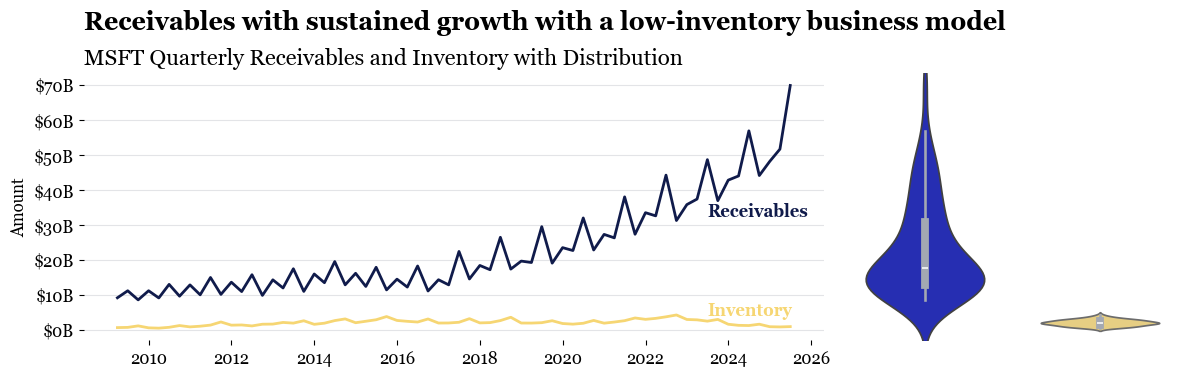

In [13]:
# Create the figure and subplots with gridspec
fig = plt.figure(figsize=(12, 4))
gs = gridspec.GridSpec(1, 3, width_ratios=[5, 1, 1])
plt.suptitle('Receivables with sustained growth with a low-inventory business model',
             x=0.077, y=0.94,
             ha='left', size=18,
             weight='bold')
ax0 = fig.add_subplot(gs[0])  # Left subplot (line plot)
ax1 = fig.add_subplot(gs[1])  # Right subplot (violin plot)
ax2 = fig.add_subplot(gs[2])  # Right subplot (violin plot)

# --- Line Plot (ax0) ---
ax0.plot(df['Date'], df['Receivables'], color=juan_colors[0], linewidth=2)
ax0.plot(df['Date'], df['Inventory'], color=juan_colors[5], linewidth=2)
ax0.set_title('MSFT Quarterly Receivables and Inventory with Distribution', size=16, loc='left')
ax0.set_xlabel('')
ax0.set_ylabel('Amount')
ax0.grid(True, color=juan_colors[2], axis='y', alpha=0.3)
ax0.spines[['top', 'left', 'bottom', 'right']].set_visible(False)
formatter_y = mtick.FuncFormatter(lambda y, p: f'${y/1e9:,.0f}B')
ax0.yaxis.set_major_formatter(formatter_y)
ax0.text(df['Date'].iloc[8], df['Receivables'].iloc[8] - 15e9, 'Receivables', 
         color=juan_colors[0], ha='left', va='center', fontsize=12, weight='bold')
ax0.text(df['Date'].iloc[8], df['Inventory'].iloc[8] + 3e9, 'Inventory', 
         color=juan_colors[5], ha='left', va='center', fontsize=12, weight='bold')

# --- Violin Plot (ax1) ---
sns.violinplot(y=df['Receivables'], ax=ax1,
               color=juan_colors[4],
               inner='box')
for artist in ax1.get_children():
    if isinstance(artist, plt.Line2D) and artist.get_linestyle() == '-':
        artist.set_color(juan_colors[2])
ax1.set_ylim(ax0.get_ylim())
ax1.set_ylabel('')
ax1.set_xticks([])
ax1.set_yticks([])
ax1.spines[['top', 'left', 'bottom', 'right']].set_visible(False)

sns.violinplot(y=df['Inventory'], ax=ax2,
               color=juan_colors[5],
               inner='box')
for artist in ax2.get_children():
    if isinstance(artist, plt.Line2D) and artist.get_linestyle() == '-':
        artist.set_color(juan_colors[2])
ax2.set_ylim(ax0.get_ylim())
ax2.set_ylabel('')
ax2.set_xticks([])
ax2.set_yticks([])
ax2.spines[['top', 'left', 'bottom', 'right']].set_visible(False)

plt.tight_layout()
plt.show()

This shows us that MSFT's growth isn't directly linked to the increase in inventory, but rather to the increase in its accounts receivable. This is important in our analysis because we can see that inventory won't directly impact EBITDA.

It is also important to be able to review the relationship between Receivables and Income, so that these increased revenues do not respond to excessive accounts receivable that affect the financial health of the company. This is precisely the analysis we begin the multivariate analysis.

# <span style="color:#0F19C9">Multivariable Analysis</span>

In [14]:
print(f'Pearson correlation coeficient between Revenue and Receivables: {df['Revenue'].corr(df['Receivables'])}')

Pearson correlation coeficient between Revenue and Receivables: 0.9627428742492226


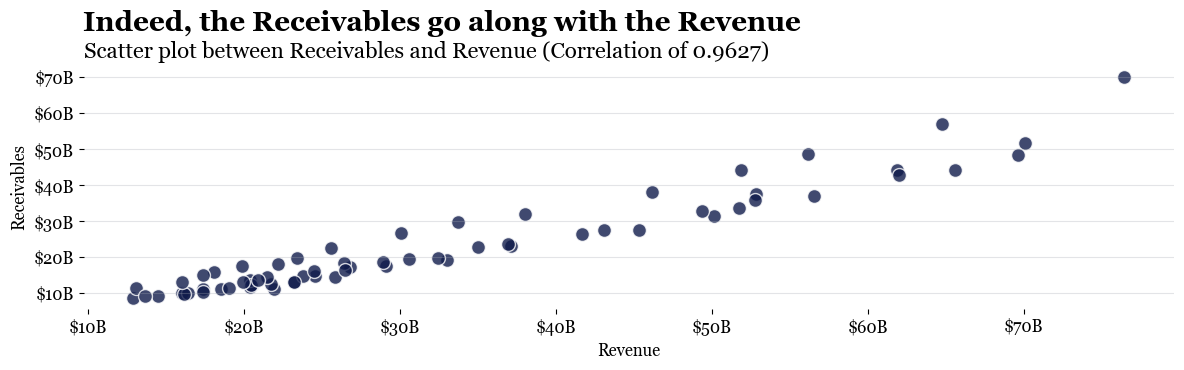

In [15]:
fig, ax = plt.subplots(figsize=(12, 4))
fig.suptitle('Indeed, the Receivables go along with the Revenue', 
             ha='left', x=0.076, y=0.92, size=20, weight='bold')
ax.scatter(df['Revenue'], df['Receivables'], 
           color=juan_colors[0], s=100, alpha=0.8, edgecolor='white')
ax.set_title('Scatter plot between Receivables and Revenue (Correlation of 0.9627)', 
             size=16, loc='left')
ax.set_xlabel('Revenue')
ax.set_ylabel('Receivables')
formatter_x = mtick.FuncFormatter(lambda x, p: f'${x/1e9:,.0f}B')
ax.xaxis.set_major_formatter(formatter_x)
formatter_y = mtick.FuncFormatter(lambda y, p: f'${y/1e9:,.0f}B')
ax.yaxis.set_major_formatter(formatter_y)
ax.grid(True, color=juan_colors[2], axis='y', alpha=0.3)
ax.spines[['top', 'left', 'bottom', 'right']].set_visible(False)

plt.tight_layout()
plt.show()

In [16]:
df.head(2)

,Date,Cost_Goods_Sold,Gross_Profit,Operating_Income,Revenue,R&D_Expenses,SG&A_Expenses,Operating_Margin,EBIT_Margin,Pre-Tax_Profit_Margin,Net_Profit_Margin,EBITDA,Total_Depreciation_Amortizacion,Other_Non-Cash_Items,Cash_Flow_From_Operating_Activities,Receivables,Inventory,EBITDA_Margin
0,2025-06-30,24014000000,52427000000,34323000000,76441000000,8829000000,9275000000,0.4562,0.4562,0.4388,0.3615,45526000000,34153000000,10965000000,136162000000,69905000000,938000000,0.5774
1,2025-03-31,21919000000,48147000000,32000000000,70066000000,8198000000,7949000000,0.4523,0.4523,0.4380,0.3579,40740000000,34153000000,10965000000,136162000000,51700000000,848000000,0.5609
